In [1]:
#########################################################################################################
#                                  Trabalho Final de Métodos Estatísticos
#########################################################################################################

# Aluno: Cássio Danelon de Almeida
# Professores: Henrique Hippert
#              Eliane Christo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import shapiro, kstest, chisquare, linregress, f_oneway
%matplotlib inline

In [2]:
df = pd.read_table("cancer.txt", skiprows=20,delim_whitespace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 9 columns):
Ident    362 non-null int64
Diagn    362 non-null int64
Idade    362 non-null int64
AKP      362 non-null float64
P        362 non-null float64
LDH      362 non-null float64
ALB      362 non-null int64
N        362 non-null int64
GL       362 non-null int64
dtypes: float64(3), int64(6)
memory usage: 25.5 KB


(51.2, 67.8]      23
(17.916, 34.6]    12
(34.6, 51.2]      11
(67.8, 84.4]       7
(84.4, 101.0]      3
Name: Idade, dtype: int64
53.267857142857146
50.93846153846154
(40.6, 56.4]    26
(56.4, 72.2]    18
(8.92, 24.8]     9
(72.2, 88.0]     6
(24.8, 40.6]     6
Name: Idade, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


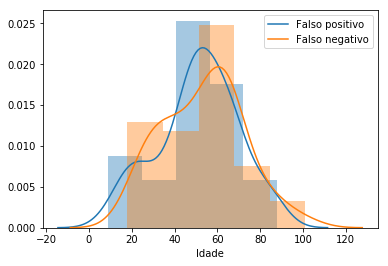

In [19]:
# Número 1 - Parte 1
# Letra b)
from tabulate import tabulate

falso_negativo = df[df['Diagn']==1]['Idade']
falso_positivo = df[df['Diagn']==4]['Idade']
ztest(falso_negativo,falso_positivo)
print(falso_negativo.value_counts(bins=5))
print(falso_negativo.mean())
print(falso_positivo.mean())
print(falso_positivo.value_counts(bins=5))
sns.distplot(falso_positivo,bins=5,kde_kws={"label": "Falso positivo"})
sns.distplot(falso_negativo,bins=5,kde_kws={"label": "Falso negativo"})
plt.legend(loc='best')

In [22]:
# Não se pode afirmar isso, uma vez que a hipótese nula não foi rejeitada.

Média: 18.778174603174598
Desvio: 12.09506006308161
Teste de Shapiro: (0.5873147249221802, 4.1256092168129094e-24)
Teste KS (0.25855675879239715, 3.922663699167866e-47)


Text(0.5,0,'LDH')

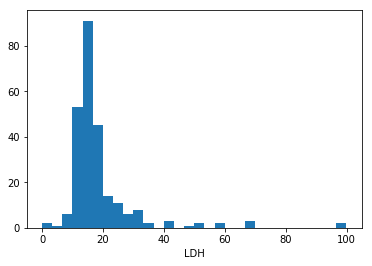

In [21]:
########################### Número 2 - Parte 1  #######################################

#df.groupby(df['Idade']>40)
ldh = df[df['Idade']>40]['LDH']
print('Média:',ldh.mean())
print('Desvio:',ldh.std())
print('Teste de Shapiro:',shapiro(ldh))
print('Teste KS',sm.stats.lilliefors(ldh))
plt.hist(ldh,bins=30)
plt.xlabel('LDH')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


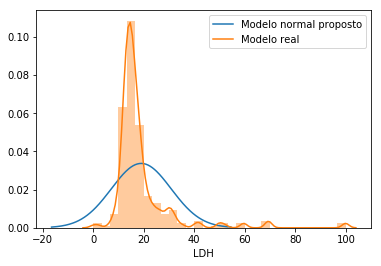

In [22]:
import matplotlib.mlab as mlab
import math

mu = 19
variance = 140
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 252)
exp = mlab.normpdf(x, mu, sigma)
plt.plot(x,exp,label='Modelo normal proposto')
sns.distplot(ldh,bins=30,kde_kws={"label": "Modelo real"})
plt.legend(loc='best')

In [7]:
obs = np.asarray(ldh)

In [83]:
Chi = chisquare(obs,exp,axis=None)
print("Valor de p-valor: {}".format(Chi[1]))
  
if(Chi[1]<0.05): 
    print("O modelo normal proposto nao pode se ajustar aos dados")
else:
    print("P-valor {}>0.05 Nao rejeita hipotese nula!".format(Chi[1]))


Valor de p-valor: 0.0
O modelo normal proposto nao pode se ajustar aos dados


In [25]:
############## Número 3 - Parte 1 #########################
# letra a)
jovens = df[df['Idade']<54]['N']
idosos = df[df['Idade']>54]['N']

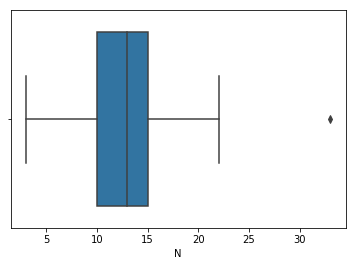

In [35]:
sns.boxplot(jovens)

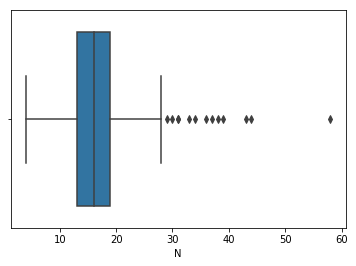

In [29]:
sns.boxplot(idosos)

Média de N: 17.228070175438596
Valor de p-valor: 0.0
O modelo normal proposto nao pode se ajustar aos dados


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()


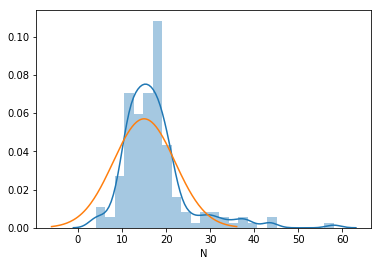

In [37]:
# letra b)
mu = idosos.mean()
print('Média de N:',mu)
sns.distplot(idosos)
obs = np.asarray(idosos)

mu_exp = 15
variance = 49
sigma = math.sqrt(variance)
x = np.linspace(mu_exp - 3*sigma, mu_exp + 3*sigma, 171)
exp = mlab.normpdf(x, mu_exp, sigma)
plt.plot(x,exp)

Chi = chisquare(obs,exp,axis=None)
print("Valor de p-valor: {}".format(Chi[1]))
  
if(Chi[1]<0.001): 
    print("O modelo normal proposto nao pode se ajustar aos dados")
else:
    print("P-valor {}>0.05 Nao rejeita hipotese nula!".format(Chi[1]))
    

Média de N: 12.837078651685394
Valor de p-valor: 0.0
O modelo normal proposto nao pode se ajustar aos dados


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()


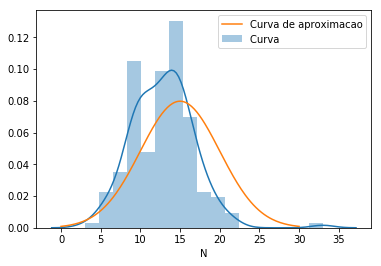

In [32]:
# letra c)
mu = jovens.mean()
print('Média de N:',mu)
sns.distplot(jovens,label='Curva ')
obs = np.asarray(jovens)

mu_exp = 15
variance = 25
sigma = math.sqrt(variance)
x = np.linspace(mu_exp - 3*sigma, mu_exp + 3*sigma, 178)
exp = mlab.normpdf(x, mu_exp, sigma)
plt.plot(x,exp,label='Curva de aproximacao')
plt.legend(loc='best')

Chi = chisquare(obs,exp,axis=None)
print("Valor de p-valor: {}".format(Chi[1]))
  
if(Chi[1]<0.001): 
    print("O modelo normal proposto nao pode se ajustar aos dados")
else:
    print("P-valor {}>0.05 Nao rejeita hipotese nula!".format(Chi[1]))

In [132]:
# letra D)
# Como era de se esperar a média dos jovens é menor do que 15 e a média dos idosos é maior do que 20. O que confirma a influência da idade
# na concentração de nitrogênio na ureia.

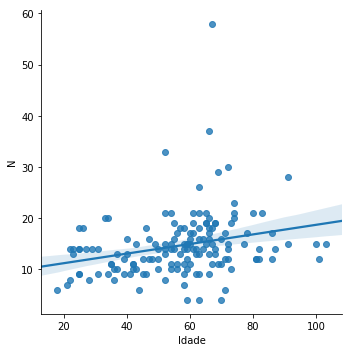

In [9]:
# Número 4 - Parte 1
# Letra a)
doentes = df[(df['Diagn'] == 1) | (df['Diagn'] == 3)]
sns.lmplot('Idade','N',data=doentes)

In [10]:
# Nota-se que os maiores valores de concentração de N ocorrem para idades mais avançadas. Porém, é possível perceber que a inclinação da reta de correlaçao nao é tao alta, o que nos confirma que há uma correlacao media entre essas duas variaveis

In [47]:
#letra b)
LR = linregress(doentes['Idade'],doentes['N'])
LR

LinregressResult(slope=0.09381801902352098, intercept=9.31133493495155, rvalue=0.2633471446328942, pvalue=0.001086787111087217, stderr=0.028155114661298664)

In [28]:
# A interpretação de ß é que se a variável idade não influenciasse a concentração N, os valores estariam dispostos em uma reta de inclinação zero torno dessa média de 9.31 

(0.11247235242613851, 7.62196029221039e-05)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


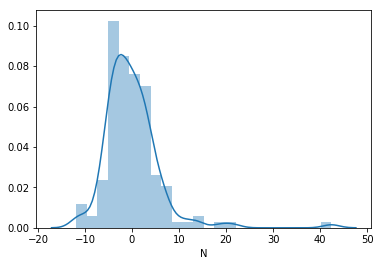

In [44]:
#letra c)

from sklearn.linear_model import LinearRegression   #Biblioteca de regressão linear

idade = np.asarray(doentes['Idade'])
N = doentes['N']

lm = LinearRegression()
lm.fit(idade.reshape(-1,1),N)       # Fitando o modelo

predictions = lm.predict(idade.reshape(-1,1))   # Estabelecendo as previsoes do modelo

residuals = N-predictions

print(sm.stats.lilliefors(residuals))    # Teste de normalidade dos resíduos

sns.distplot(N-predictions)

In [ ]:
# Como os resíduos não apresentam distribuição normal o teste Anova não é confiável

In [45]:
anova = f_oneway(doentes['Idade'],doentes['N'])    # Teste Anova
anova

F_onewayResult(statistic=757.507538911907, pvalue=4.576837428519746e-84)

In [ ]:
# Pelo teste Anova não há evidência estatística que comprove a influência da idade na concentração de N na uréia

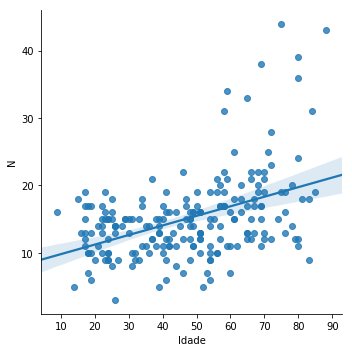

In [8]:
#letra d)
saudaveis = df[(df['Diagn'] == 2) | (df['Diagn'] == 4)]
sns.lmplot('Idade','N',data=saudaveis)

In [9]:
# Letra e
LR2 = linregress(saudaveis['Idade'],saudaveis['N'])
LR2

LinregressResult(slope=0.14210591435484798, intercept=8.378118363690128, rvalue=0.43766995426433447, pvalue=2.763010487770254e-11, stderr=0.02019377529489043)

In [19]:
# A inclinação da reta é maior, ou seja a correlação é maior

pandas.core.series.Series

In [48]:
# A influência da idade é maior nos saudáveis.